## **Making imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Functions.startup_age import AgeDataAnalyzing
from Functions.internet_activity import InternetActivity
from Functions.company_industry import IndustryAnalyzing
from Functions.team_grown import TeamGrown
from Functions.top_company_worked import TopCompanyAnalyze
from Functions.founders_experience import FoundersExperience
from Functions.product_service import ProductService

## **Analyzing Data**

### **Loading DataFrame**

In [2]:
df = pd.read_csv(r"C:\Users\Mikayel\PycharmProjects\InternshipTask\Data\data.csv", encoding='latin-1')
columns_for_model = []

### **Age of company in years**

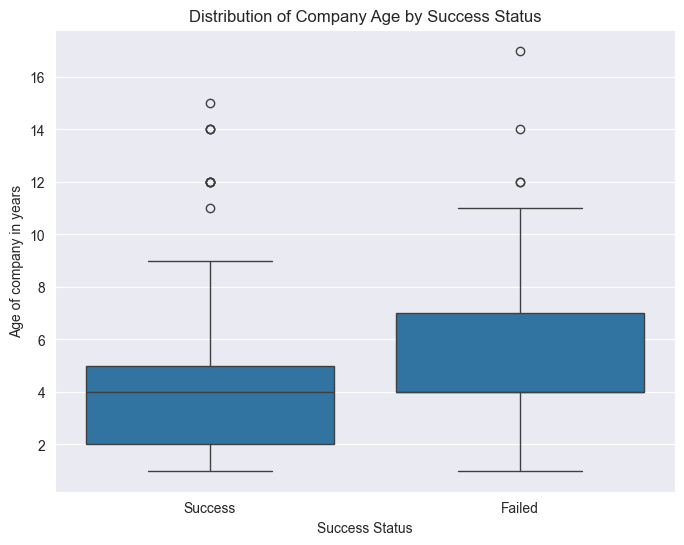

In [3]:
AgeAnalyze = AgeDataAnalyzing(dataframe=df)
AgeAnalyze.filling_age_missing_values()
AgeAnalyze.company_age_boxplot()

### **Internet Activity Score**

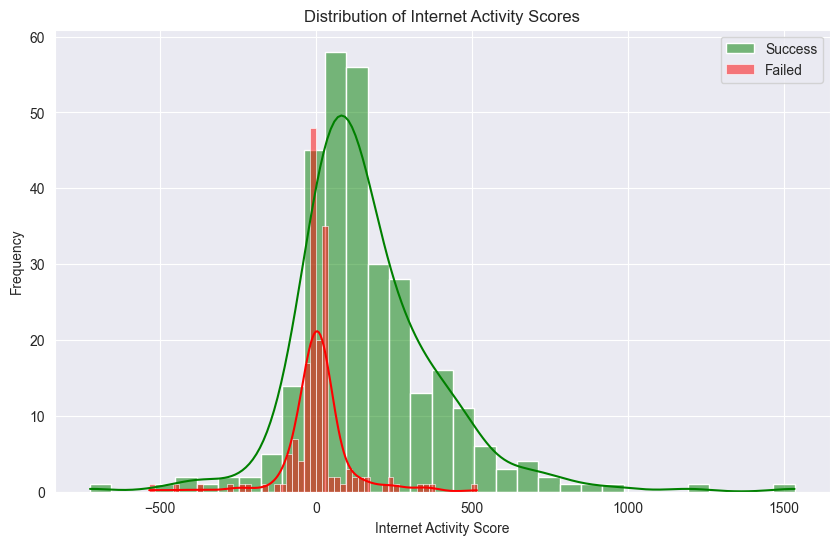

In [4]:
InternetAnalyze = InternetActivity(dataframe=df)
InternetAnalyze.fill_na_with_stage_mean()
InternetAnalyze.analyze_internet_activity(plot=True)
columns_for_model.append('Internet Activity Score')

### **Industry of company**

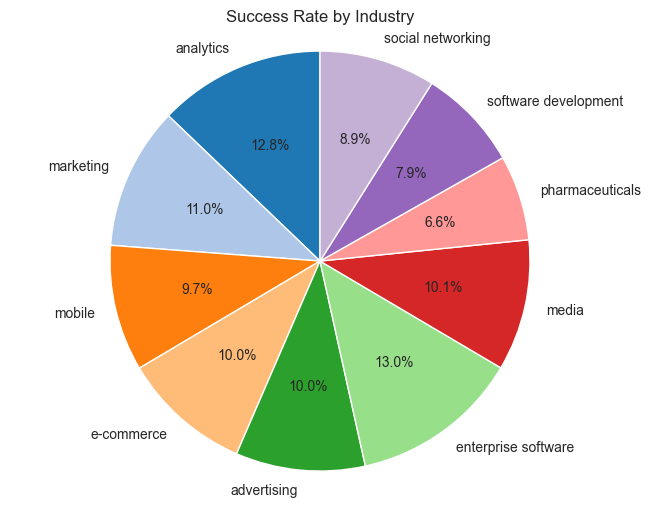

In [5]:
IndustryAnalyze = IndustryAnalyzing(dataframe=df)
IndustryAnalyze.industry_success_distribution(pie_count=10, success=True)
columns_for_model.append('Industry of company')

### **Company Team Growth**

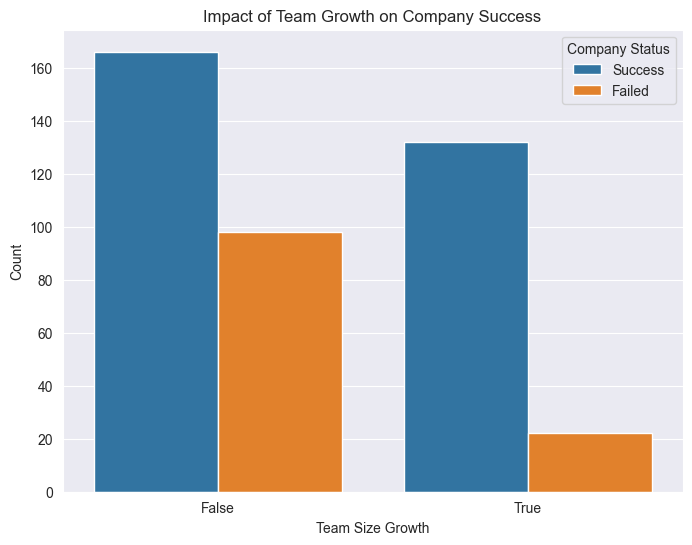

In [6]:
TeamGrowth = TeamGrown(df)
TeamGrowth.plot_team_growth_success()

### **Worked in top companies**

In [7]:
TopCompany = TopCompanyAnalyze(df)
TopCompany.analyze_data()
columns_for_model.append('Worked in top companies')

Success rate in a top company - 78.08219178082192
Success rate out of a top comapny - 65.94594594594595


### **Founders & cofounders experience**

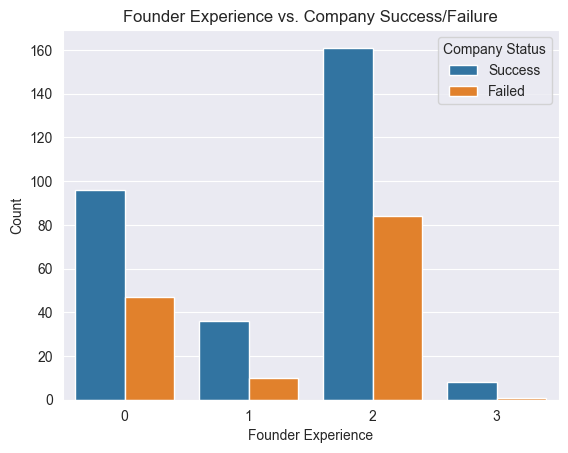

Success Rate for Founder Experience 0: 67.13%
Success Rate for Founder Experience 1: 78.26%
Success Rate for Founder Experience 2: 65.71%
Success Rate for Founder Experience 3: 88.89%


In [8]:
Founderexp = FoundersExperience(df)
Founderexp.plot_founder_experience_vs_success()
columns_for_model.append('Founder Experience')

### **Product or Service**

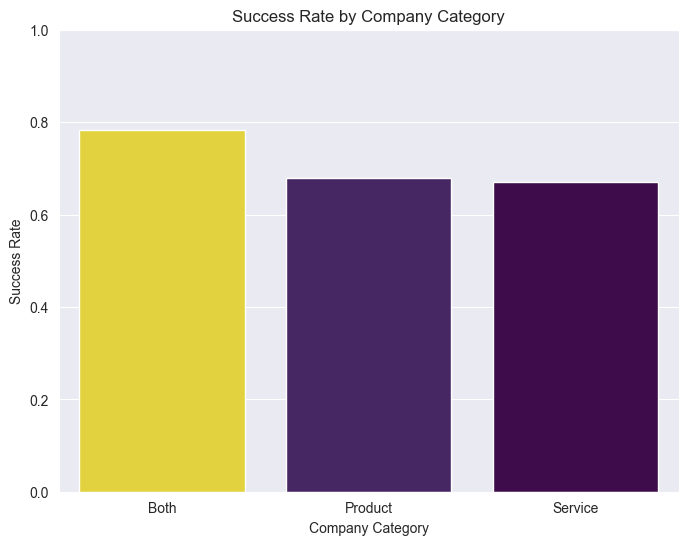

In [9]:
ProdServ = ProductService(df)
ProdServ.plot_success_by_category()